# Trabalho - Unidade 2

Identificação dos alunos (nome completo): 
**Bledson Kivy do Nascimento Bezerra**

- Este trabalho irá compor 60% da segunda unidade
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino

## Importação e preparação dos dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

disciplinas_filename = 'componentes-curriculares-presenciais.csv'

turmas_filenames = ['turmas-2014.1.csv',
                    'turmas-2014.2.csv',
                    'turmas-2015.1.csv',
                    'turmas-2015.2.csv',
                    'turmas-2016.1.csv',
                    'turmas-2016.2.csv',
                    'turmas-2017.1.csv']

notas_filenames = ['matricula-componente-20141.csv',
                   'matricula-componente-20142.csv',
                   'matricula-componente-20151.csv',
                   'matricula-componente-20152.csv',
                   'matricula-componente-20161.csv',
                   'matricula-componente-20162.csv',
                   'matricula-componente-20171.csv']

disciplinas_geral = pd.read_csv(disciplinas_filename, sep=';')

turmas_geral = []
notas_geral = []
for turmas_fn, notas_fn in zip(turmas_filenames, notas_filenames):
    turmas_geral.append(pd.read_csv(turmas_fn, sep=';'))
    notas_geral.append(pd.read_csv(notas_fn, sep=';'))

turmas_geral = pd.concat(turmas_geral)
notas_geral = pd.concat(notas_geral)

In [2]:
# codigo das disciplinas FMC I, FMC II
# e Probabilidade, respectivamente
cod_disciplinas = ['IMD0028', 'IMD0038', 'IMD0033']

disciplinas = disciplinas_geral[disciplinas_geral.codigo.isin(cod_disciplinas)]
disciplinas = disciplinas[disciplinas.nivel == 'G']
disciplinas = disciplinas[['id_componente', 'nome', 'codigo']]

In [3]:
# pega as turmas para as disciplinas acima

turmas = turmas_geral[turmas_geral.id_componente_curricular.isin(
    disciplinas.id_componente)]
turmas = turmas[turmas.situacao_turma == 'CONSOLIDADA']
turmas = turmas.drop_duplicates(subset='id_turma')
turmas = turmas[['id_turma', 'id_componente_curricular']]

In [4]:
# pega as notas para as turmas acima

notas = notas_geral[notas_geral.id_turma.isin(turmas.id_turma)]

notas = notas[notas.descricao != 'CANCELADO']
notas = notas[['discente', 'id_turma', 'unidade', 'nota', 'media_final']]

notas.dropna(subset=['media_final'], inplace=True)

In [5]:
# faz a uniao dos DFs e filtra
# as colunas importantes ao problema

merge_imd = disciplinas.merge(turmas,
                              left_on='id_componente',
                              right_on='id_componente_curricular')

merge_imd = merge_imd.merge(notas,
                            on='id_turma')

cols = ['nome', 'discente', 'unidade', 'nota', 'media_final', 'codigo']
merge_imd = merge_imd[cols]

# agora que nao ha unidades vazias,
# reverte a coluna para int
merge_imd['unidade'] = merge_imd.unidade.astype('int32')

## Questão 1

In [6]:
def notas_plot(x, **kwargs):
    notas_range = [5, 7, 9]
    colors_range = ['r', 'g', 'b']
    alpha_range = [.5, .5, .3]
    x = np.sort(x)
    mean = x.mean()
    std = x.std()
    pdf = stats.norm.pdf(x, mean, std)
    
    plt.plot(x, pdf)
    
    ax = plt.gca()
    
    for n, c, a in zip(notas_range, colors_range, alpha_range):
        ax.fill_between(x[x <= n],
                    pdf[x <= n],
                    color=c,
                    alpha=a)
        plt.axvline(n, color=c)
        percent = (len(x[x <= n]) / len(x)) * 100
        plt.text(n + .13,
                 .163,
                 str(round(percent, 2)) + '%')

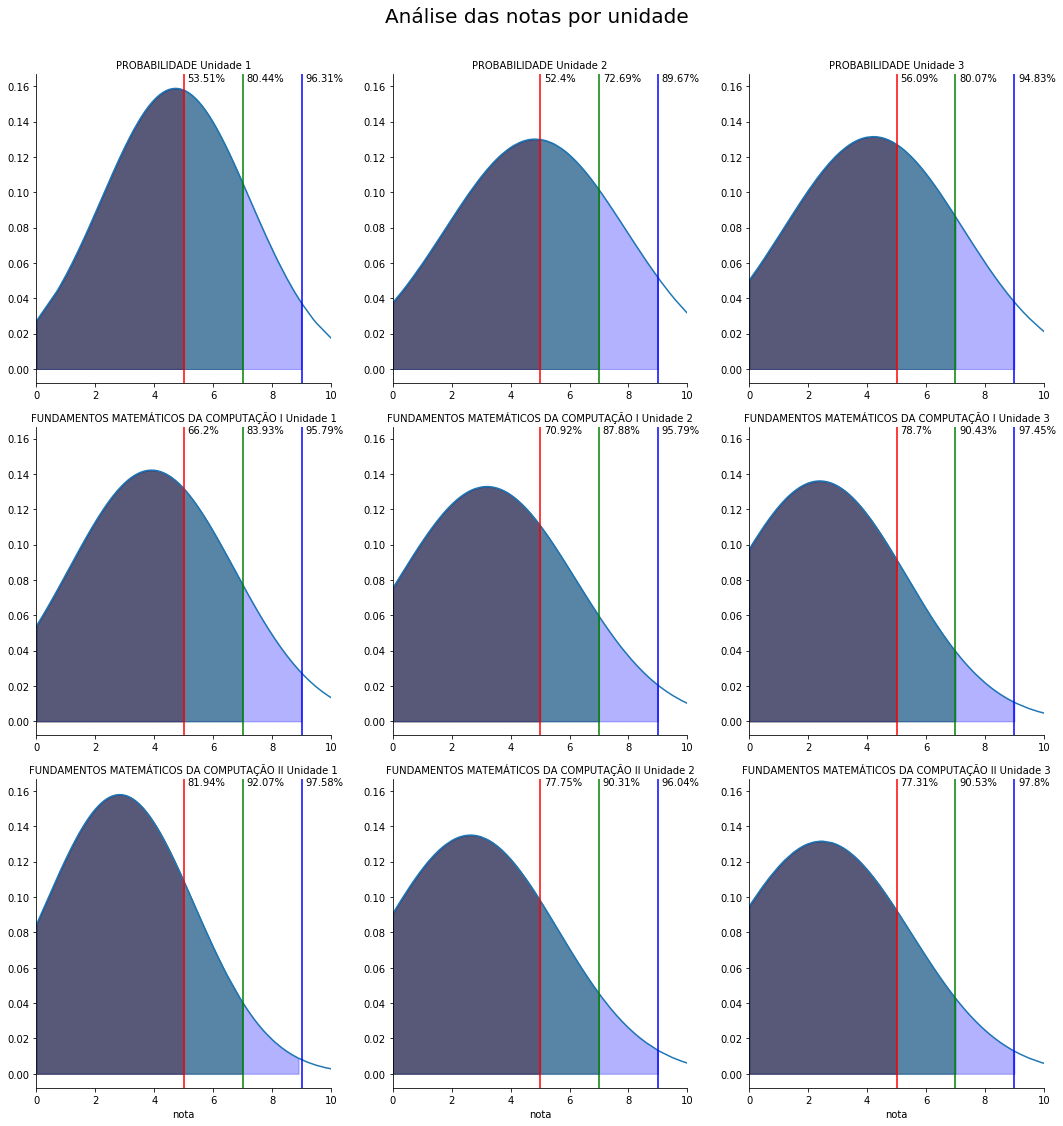

In [7]:
# notas por unidade

g = sns.FacetGrid(merge_imd, row='nome', col='unidade', size=5)
g.map(notas_plot, 'nota')
g.set_titles('{row_name} ' + 'Unidade {col_name}')

for ax in g.axes.flat:
    ax.set_xlim(0, 10)
    
plt.suptitle('Análise das notas por unidade',
             fontsize=20,
             y=1.04)

plt.show()

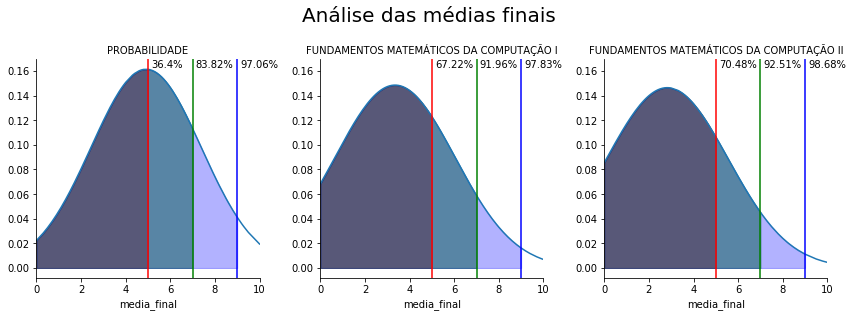

In [8]:
# medias finais

g = sns.FacetGrid(merge_imd, col='nome', size=4)
g.map(notas_plot, 'media_final')
g.set_titles('{col_name}')

for ax in g.axes.flat:
    ax.set_xlim(0, 10)
    
plt.suptitle('Análise das médias finais',
             fontsize=20,
             y=1.09)

plt.show()

## Questão 2

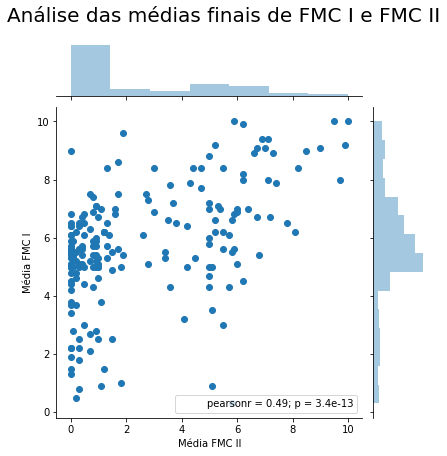

In [9]:
dados_fmc2 = merge_imd[merge_imd.codigo == 'IMD0038']
dados_fmc2 = dados_fmc2.drop_duplicates(subset=['discente'])

dados_fmc1 = merge_imd[merge_imd.codigo == 'IMD0028']
dados_fmc1 = dados_fmc1.drop_duplicates(subset=['discente'])

dados_fmc = pd.merge(dados_fmc2, dados_fmc1, on='discente')

g = sns.jointplot(x='media_final_x',
                   y='media_final_y',
                   data=dados_fmc)

g.set_axis_labels('Média FMC II', 'Média FMC I')

plt.suptitle('Análise das médias finais de FMC I e FMC II',
             fontsize=20,
             y=1.05)

plt.show()